### Linear Regression

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [3]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

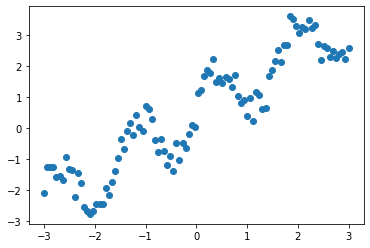

In [4]:
plt.plot(x, y, 'o');

In [5]:
# Need a 2d array for ML
print('Before:', x.shape)
X = x[:, np.newaxis]
print('After:', X.shape)

Before: (100,)
After: (100, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=42)
# No stratify because y is a continous variable

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Weight coefficient:', regressor.coef_)
print('y-intercept:', regressor.intercept_)


Weight coefficient: [0.90211711]
y-intercept: 0.44840974988268


$$y = \text{weight} \times x + \text{intercept .}$$

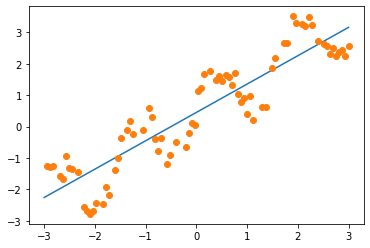

In [9]:
min_point = X.min() * regressor.coef_[0] + regressor.intercept_
max_point = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_point, max_point])
plt.plot(X_train, y_train, 'o');

In [10]:
y_pred = regressor.predict(X_test)

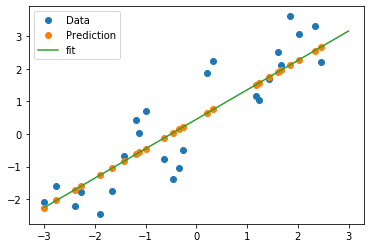

In [15]:
plt.plot(X_test, y_test, 'o', label='Data')
plt.plot(X_test, y_pred, 'o', label='Prediction')
plt.plot([X.min(), X.max()], [min_point, max_point], label='fit')
plt.legend(loc='best')

In [16]:
X2 = np.sin(4 * X[:,])
X2.shape

(100, 1)

In [17]:
X3 = np.concatenate((X, X2), axis=1)

In [18]:
X3.shape

(100, 2)

In [19]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.25,
                                                   random_state=42)

In [20]:
regressor.fit(X3_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred_sin = regressor.predict(X3_test)

In [37]:
y_pred_sin

array([ 3.44729598,  1.42973438,  0.71036852, -0.70901896, -0.85503154,
       -0.73930142, -1.5698797 ,  3.19787879, -1.75872468, -1.96772322,
       -2.42004388,  0.3021657 ,  1.30966862,  0.23597473,  2.50206669,
       -1.25881047,  2.19254311,  2.48915843, -2.12300915,  0.33618543,
        1.77431027,  2.86285056, -0.39038989, -0.97265537,  0.61711303])

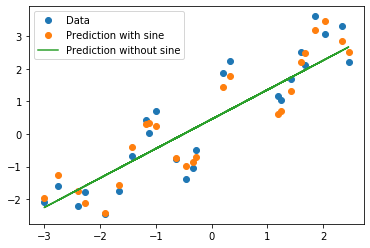

In [47]:
plt.plot(X3_test[:,0], y_test, 'o', label='Data')
plt.plot(X3_test[:,0], y_pred_sin, 'o', label='Prediction with sine')
plt.plot(X3_test[:,0], y_pred, label='Prediction without sine')
plt.legend(loc='best');

### KNeighbors Regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [61]:
knr_y_pred = knr.predict(X_test)

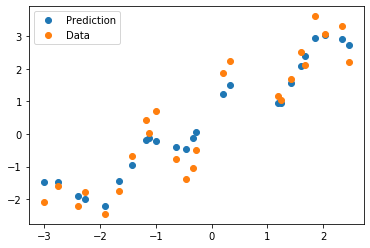

In [62]:
plt.plot(X_test, knr_y_pred, 'o', label='Prediction')
plt.plot(X_test, y_test, 'o', label='Data')
plt.legend(loc='best');

In [63]:
knr.score(X_test, y_test)

0.9275059643132191

In [64]:
from sklearn.datasets import load_boston

In [65]:
boston = load_boston()

In [67]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [71]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [72]:
X = boston.data
y = boston.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [75]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.7168057552393374
0.7789410172622865


In [87]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [88]:
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.6667843569655112
0.5281871748119744


Bad knr score because the features are on varying scales which affects the distance to neighbors